# Test relocation results from hypoDD

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygmt

reloc_file = '/N/u/mdaislam/Quartz/Arif-projects/softwares/hypodd_pywrapper/data/runs/run_detections_test/hypoDD.csv'

In [9]:
reloc_df = pd.read_csv(reloc_file)
reloc_df

,event_id,hypodd_id,latitude,longitude,depth,x_m,y_m,z_m,ex_m,ey_m,...,second,magnitude,n_cc_p,n_cc_s,n_cat_p,n_cat_s,rms_cc,rms_cat,cluster_id,origin_time
0,nc73818801_20200309_105118,100000,40.474048,-124.482821,30.607,-433.4,927.2,826.6,214.3,303.1,...,18.67,0.00,3,2,0,0,0.174,-9.0,1,2020-03-09T10:51:18.670Z
1,nc73818801_20200318_231602,100001,40.464925,-124.477401,29.667,26.2,-85.8,-113.2,158.8,160.7,...,2.08,0.00,3,7,0,0,0.060,-9.0,1,2020-03-18T23:16:02.080Z
2,nc73818801_20200318_221538,100002,40.467175,-124.478092,29.867,-32.4,164.0,86.8,151.8,200.8,...,38.68,0.00,2,4,0,0,0.048,-9.0,1,2020-03-18T22:15:38.680Z
3,nc73818801_20200319_043731,100003,40.466650,-124.476343,29.648,116.0,105.7,-131.6,152.2,196.2,...,31.98,0.00,3,4,0,0,0.133,-9.0,1,2020-03-19T04:37:31.980Z
4,nc73818801_20200409_072816,100004,40.475195,-124.485197,30.798,-634.9,1054.6,1018.0,266.3,344.3,...,16.29,0.00,2,2,0,0,0.180,-9.0,1,2020-04-09T07:28:16.290Z
5,nc73818801_20200510_154438,100005,40.464404,-124.477197,29.635,43.5,-143.7,-145.5,196.5,226.7,...,38.27,0.00,2,8,0,0,0.035,-9.0,1,2020-05-10T15:44:38.270Z
6,nc73818801_20201104_192149,100006,40.466060,-124.473975,29.245,316.8,40.2,-535.3,350.4,457.5,...,49.32,0.00,2,2,0,0,0.201,-9.0,1,2020-11-04T19:21:49.320Z
7,nc73818801_20201120_040134,100007,40.467696,-124.476888,29.643,69.7,221.9,-136.5,181.2,314.7,...,34.29,0.00,2,2,0,0,0.069,-9.0,1,2020-11-20T04:01:34.290Z
8,nc73818801_20201230_230358,100008,40.466536,-124.475277,29.532,206.4,93.1,-248.0,230.3,319.0,...,58.62,0.00,2,3,0,0,0.125,-9.0,1,2020-12-30T23:03:58.620Z
9,nc73818801_20201231_131257,100009,40.466252,-124.474772,29.454,249.2,61.4,-325.6,223.2,343.0,...,57.15,0.00,2,3,0,0,0.125,-9.0,1,2020-12-31T13:12:57.150Z


Avg. distance from template: 0.34 km
Max distance from template: 1.42 km
Min distance from template: 0.00 km
median distance from template: 0.26 km
Number of events: 23


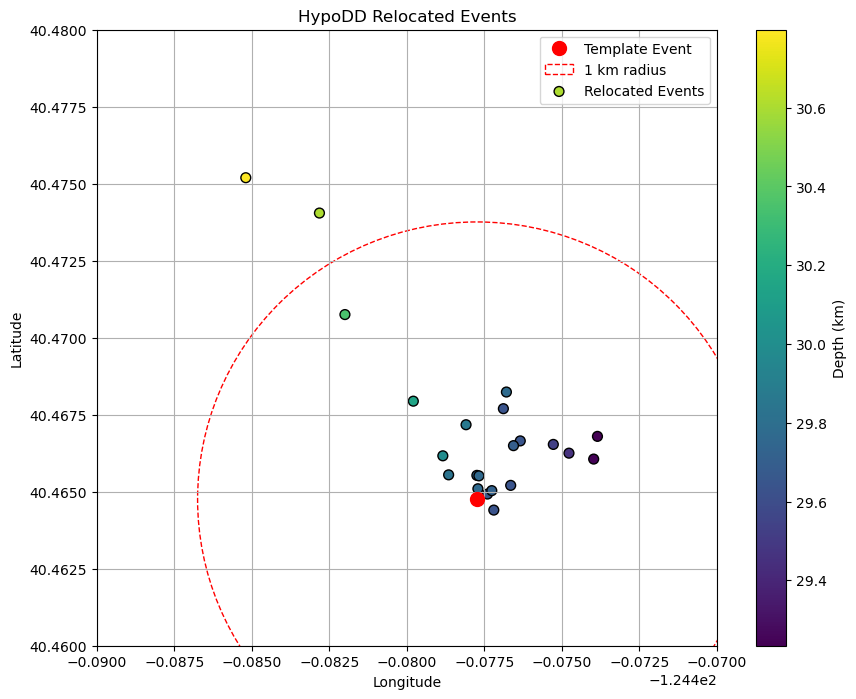

In [10]:
# from geopy import geodetic

template = reloc_df.loc[reloc_df['event_id'] == 'nc73818801']
dists = np.sqrt((reloc_df['longitude'] - template['longitude'].values[0])**2 +
                (reloc_df['latitude'] - template['latitude'].values[0])**2) * 111  # approximate conversion from degrees to km
print(f"Avg. distance from template: {dists.mean():.2f} km")
print(f"Max distance from template: {dists.max():.2f} km")
print(f"Min distance from template: {dists.min():.2f} km")
print(f"median distance from template: {dists.median():.2f} km")
print(f"Number of events: {len(reloc_df)}")

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(template['longitude'], template['latitude'], 'ro', markersize=10, label='Template Event')
# draw 1 km radius circle around the template event
circle = plt.Circle((template['longitude'].values[0], template['latitude'].values[0]), 1/111, color='r', fill=False, linestyle='--', label='1 km radius')
ax.add_artist(circle)

sc = ax.scatter(reloc_df['longitude'], reloc_df['latitude'], c=reloc_df['depth'], cmap='viridis', s=50, edgecolor='k', label='Relocated Events')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Depth (km)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('HypoDD Relocated Events')
ax.set_xlim(reloc_df['longitude'].min().round(2), reloc_df['longitude'].max().round(2))
ax.set_ylim(reloc_df['latitude'].min().round(2), reloc_df['latitude'].max().round(2))
ax.legend()

plt.grid()
plt.show()

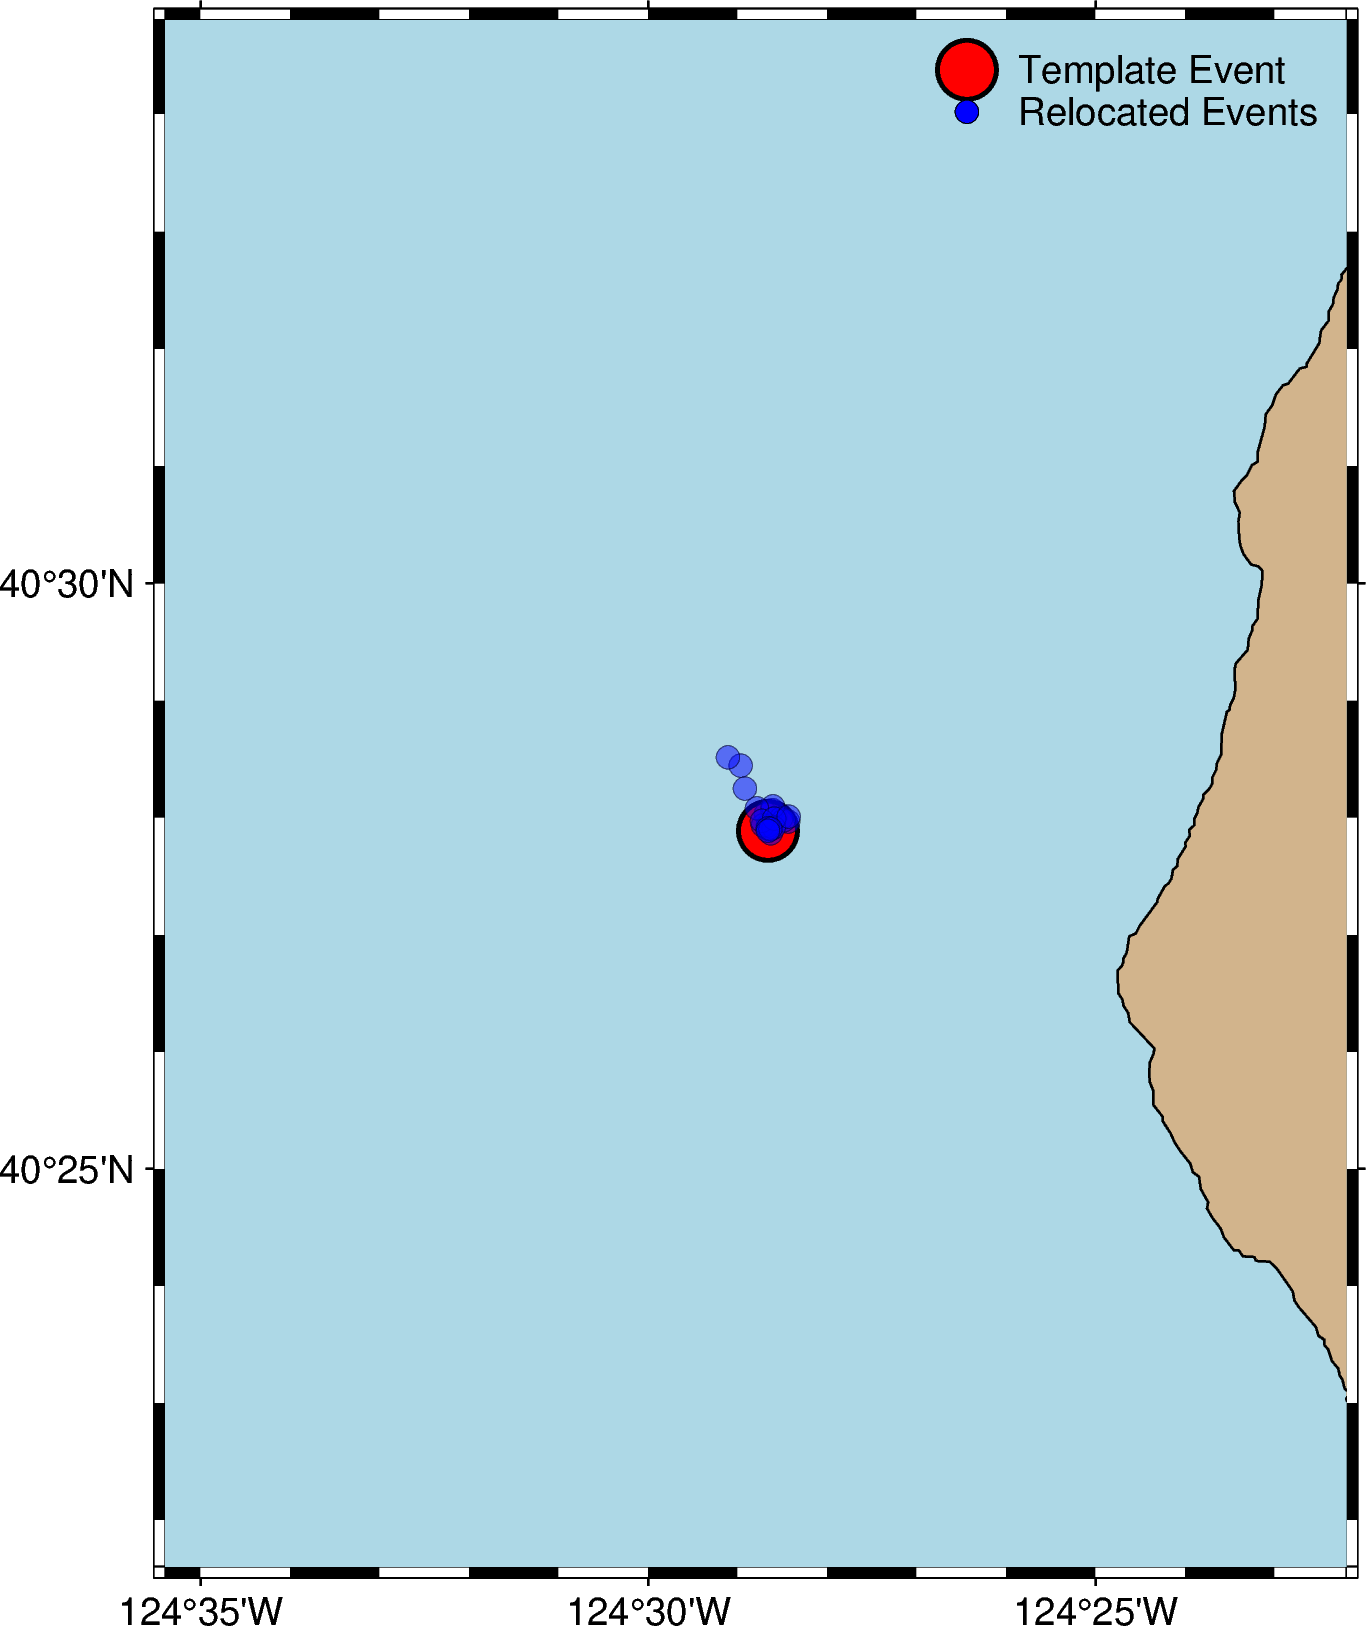

In [16]:
fig = pygmt.Figure()    

eps = 0.1
fig.basemap(region=[reloc_df['longitude'].min().round(2)-eps, reloc_df['longitude'].max().round(2)+eps,
                    reloc_df['latitude'].min().round(2)-eps, reloc_df['latitude'].max().round(2)+eps],
             projection='M10c', frame=True)
fig.coast(shorelines='1/0.5p,black', water='lightblue', land='tan', borders='1/0.5p,black')
fig.plot(x=template['longitude'], y=template['latitude'], style='c0.5c', fill='red', pen='1p,black', label='Template Event')
fig.plot(x=reloc_df['longitude'], y=reloc_df['latitude'], style='c0.2c', fill='blue', pen='0.1p,black', transparency=50, label='Relocated Events')
fig.legend(position='JTR+jTR+o0.1c')
fig.show()

In [12]:
vel_file = '/N/u/mdaislam/Quartz/Arif-projects/Match-Filter-Event-Detection/event_detection/data/yoon-shelly-2024-velmodel.txt'
vel_df = pd.read_csv(vel_file, skiprows=1, sep='\\s+', names=['depth_km', 'vp_km_s', 'vs_km_s'])
vel_df['vp_vs'] = vel_df['vp_km_s'] / vel_df['vs_km_s']
vel_df

,depth_km,vp_km_s,vs_km_s,vp_vs
0,-2.0,3.5000,2.0208,1.731987
1,0.0,3.5000,2.0208,1.731987
2,0.6,3.7214,2.1486,1.732012
3,1.2,3.9429,2.2765,1.732001
4,1.8,4.1643,2.4043,1.732022
5,2.4,4.3857,2.5322,1.731972
6,3.0,4.6071,2.6600,1.731992
7,3.6,4.8286,2.7879,1.731985
8,4.2,5.0500,2.9157,1.732003
9,4.8,5.1124,2.9517,1.732019


In [13]:
for col in ['depth_km', 'vp_km_s', 'vp_vs']:
    data = ' '.join([f"{val:5.3f}" for val in vel_df[col] if not pd.isnull(val)]) + ' -9'
    print(f'* {col}')
    print(data)

* depth_km
-2.000 0.000 0.600 1.200 1.800 2.400 3.000 3.600 4.200 4.800 5.400 6.000 8.000 10.000 12.000 14.000 16.000 18.000 20.000 22.000 24.000 41.000 -9
* vp_km_s
3.500 3.500 3.721 3.943 4.164 4.386 4.607 4.829 5.050 5.112 5.175 5.237 5.445 5.653 5.861 6.069 6.276 6.484 6.692 6.900 7.900 7.900 -9
* vp_vs
1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 1.732 -9
